## Asymmetries on line bisectors

In [ ]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 20,
        'axes.labelsize': 26,
        'axes.titlesize': 22,
        'legend.fontsize': 26,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }

plt.rcParams.update(params)

In [2]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values ALL.xlsx")

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown']

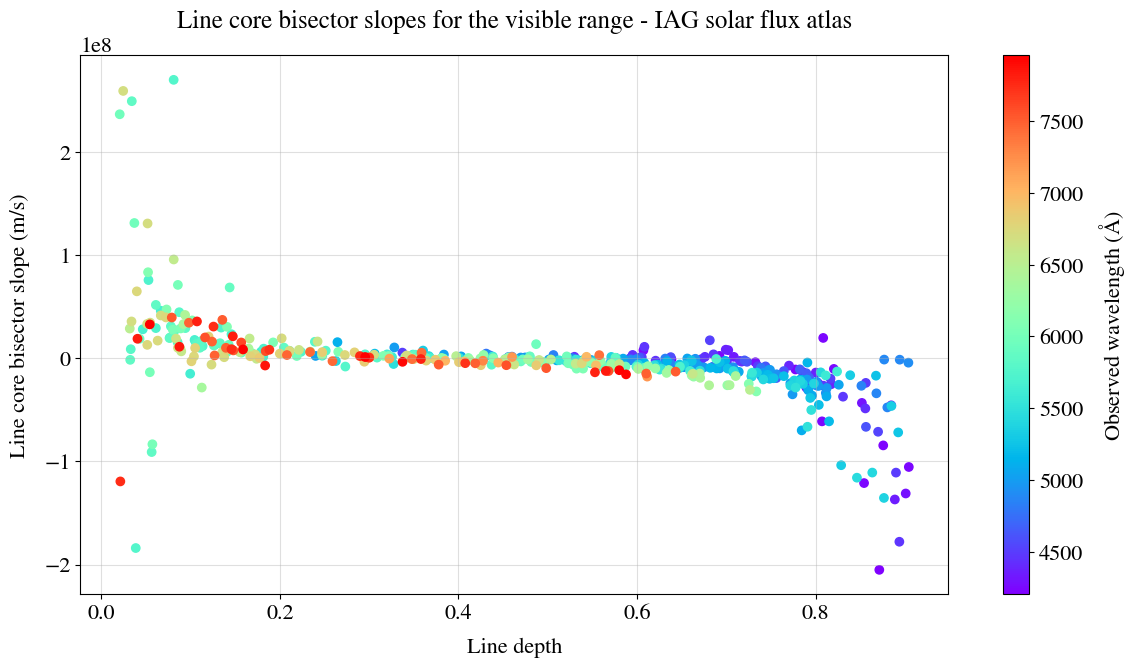

In [3]:
fig1, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Bisector slope'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Line core bisector slopes for the visible range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig1.savefig('Bisector_VIS')

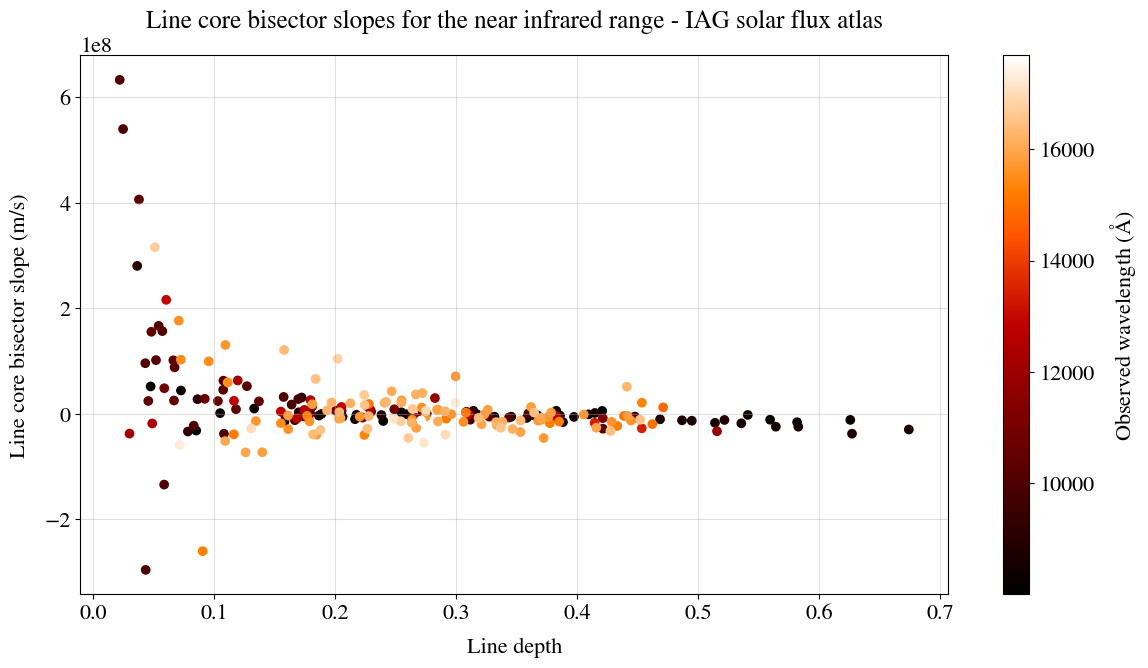

In [4]:
fig1, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(NIR_data['Line Depth'],NIR_data['Bisector slope'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Line core bisector slopes for the near infrared range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig1.savefig('Bisector_NIR')

### General lineal tendency

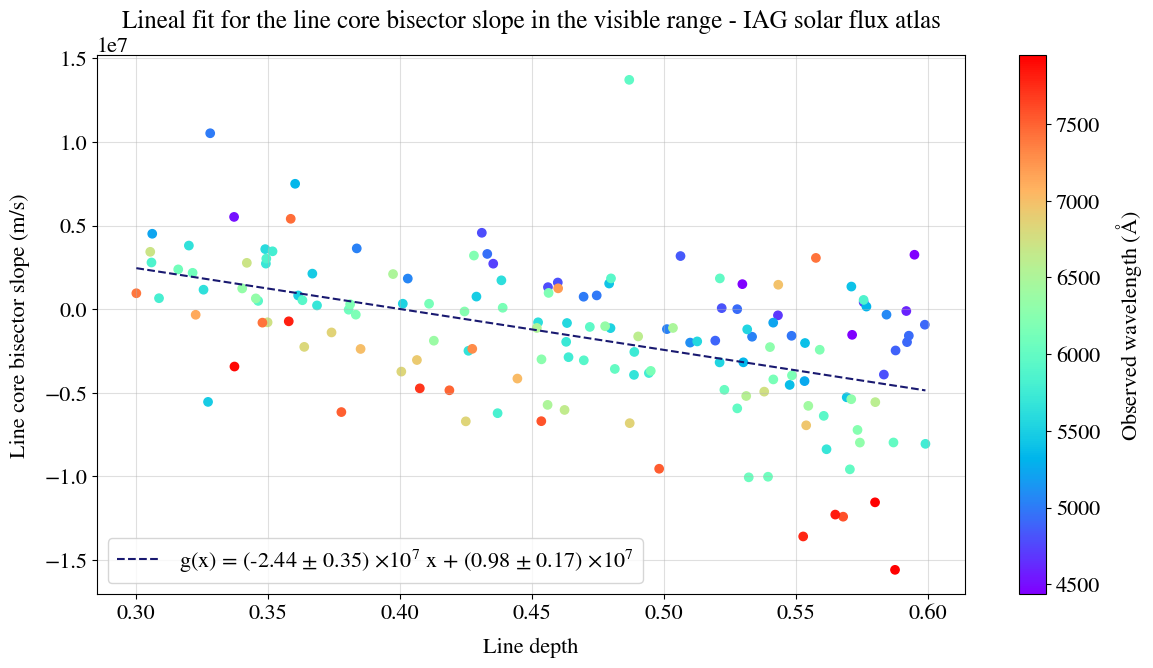

In [5]:
#In the report is given in function of the velocity
values_VIS_standard = VIS_data[VIS_data['Line Depth'].between(0.3,0.6,inclusive='right')]

#Made a polynomial first order fit
param, cov = np.polyfit(values_VIS_standard['Line Depth'],values_VIS_standard['Bisector slope'], 1,cov=True)
values_fit = np.linspace(min(values_VIS_standard['Line Depth']), max(values_VIS_standard['Line Depth']), len(values_VIS_standard['Line Depth']))
fit = np.polyval(param,values_fit)
# Standard error
error = np.sqrt(np.diag(cov))

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(14,7))

ax1.set_title(r'Lineal fit for the line core bisector slope in the visible range - IAG solar flux atlas',pad = 20)

scatter = ax1.scatter(values_VIS_standard['Line Depth'],values_VIS_standard['Bisector slope'],c=values_VIS_standard["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$', labelpad=10)

ax1.plot(values_fit,fit,linestyle='--',c='midnightblue',
         label=rf'g(x) = ({round(param[0]*1e-7,2)} $\pm$ {round(error[0]*1e-7,2)}) $\times 10^{{7}}$ x + ({round(param[1]*1e-7,2)} $\pm$ {round(error[1]*1e-7,2)}) $\times 10^{{7}}$')
ax1.set_xlabel(r'Line depth',labelpad=10)
ax1.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10)
ax1.grid(alpha=0.4)
ax1.legend()

# fig2.savefig('Bisector slope_VIS')

In [6]:
param

array([-24441061.40876577,   9789786.61444891])

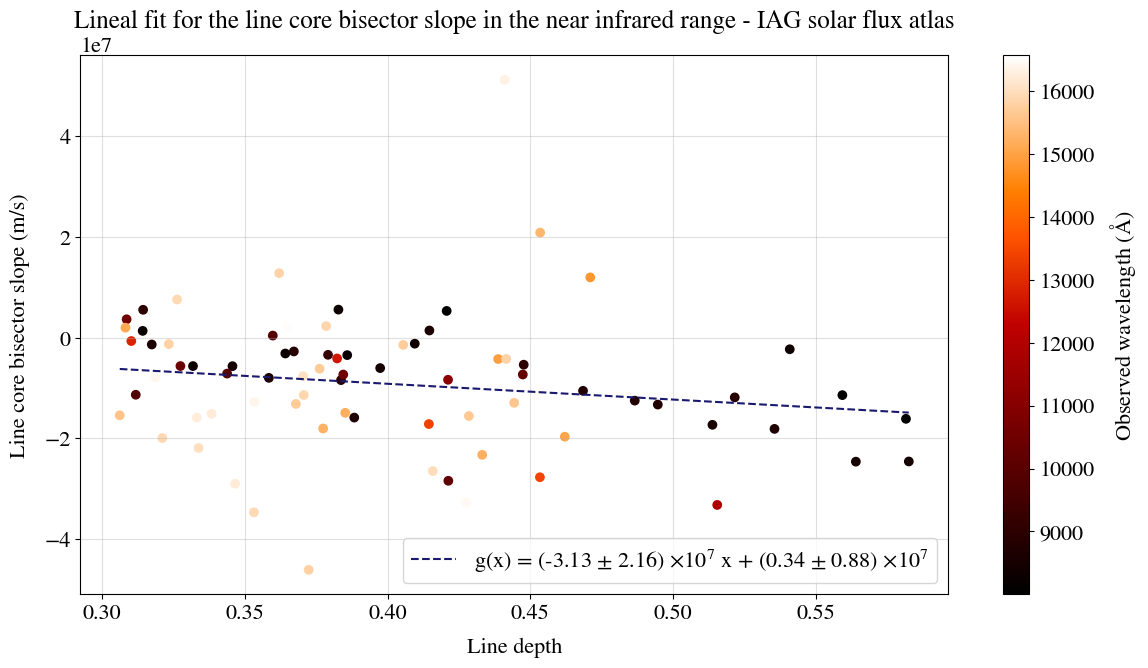

In [7]:
#In the report is given in function of the velocity
values_NIR_standard = NIR_data[NIR_data['Line Depth'].between(0.3,0.6,inclusive='right')]

#Made a polynomial first order fit
param, cov = np.polyfit(values_NIR_standard['Line Depth'],values_NIR_standard['Bisector slope'], 1,cov=True)
values_fit = np.linspace(min(values_NIR_standard['Line Depth']), max(values_NIR_standard['Line Depth']), len(values_NIR_standard['Line Depth']))
fit = np.polyval(param,values_fit)
# Standard error
error = np.sqrt(np.diag(cov))

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(14,7))

ax1.set_title(r'Lineal fit for the line core bisector slope in the near infrared range - IAG solar flux atlas',pad = 20)

scatter = ax1.scatter(values_NIR_standard['Line Depth'],values_NIR_standard['Bisector slope'],c=values_NIR_standard["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$', labelpad=10)

ax1.plot(values_fit,fit,linestyle='--',c='midnightblue',
         label=rf'g(x) = ({round(param[0]*1e-7,2)} $\pm$ {round(error[0]*1e-7,2)}) $\times 10^{{7}}$ x + ({round(param[1]*1e-7,2)} $\pm$ {round(error[1]*1e-7,2)}) $\times 10^{{7}}$')
ax1.set_xlabel(r'Line depth',labelpad=10)
ax1.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10)
ax1.grid(alpha=0.4)
ax1.legend()

# fig2.savefig('Bisector slope_NIR')

### Line depth separated bins

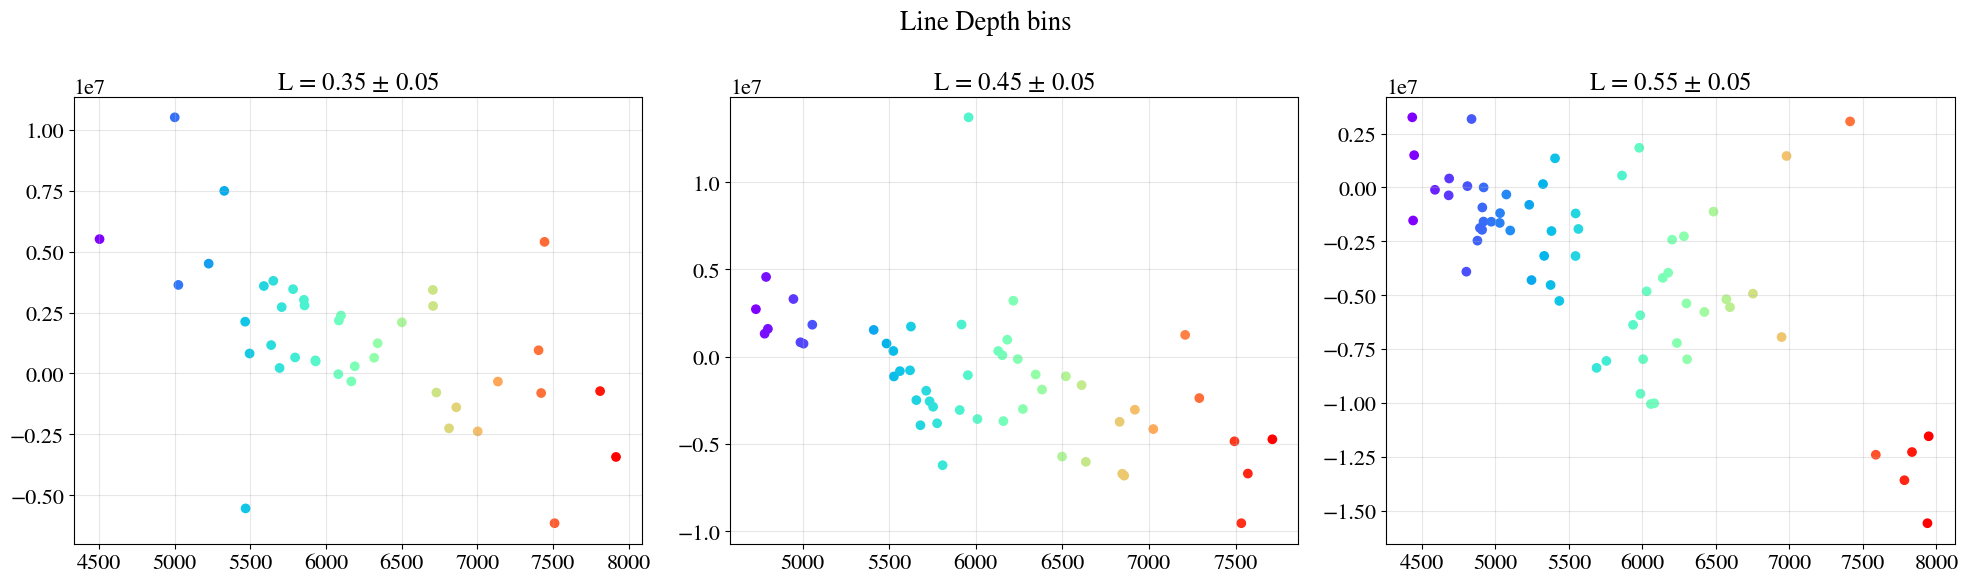

In [8]:
#Organize the dataframe wtih ascending velocities
listed = values_VIS_standard.sort_values('Line Depth', ascending=True, na_position='first').reset_index(drop=True)
velocity_ALL = []

#Make the markers like profesor Benjamin
markers = [0.35,0.45,0.55]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_ALL.append(values_VIS_standard[values_VIS_standard['Line Depth'].between(each-0.05, each+0.05, inclusive='neither')])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Line Depth bins')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_ALL[i]['Observed wavelength'],velocity_ALL[i]['Bisector slope'],c=velocity_ALL[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'L = {markers[i]} $\pm$ 0.05')
        ax.grid(True, alpha=0.3)

fig.tight_layout()

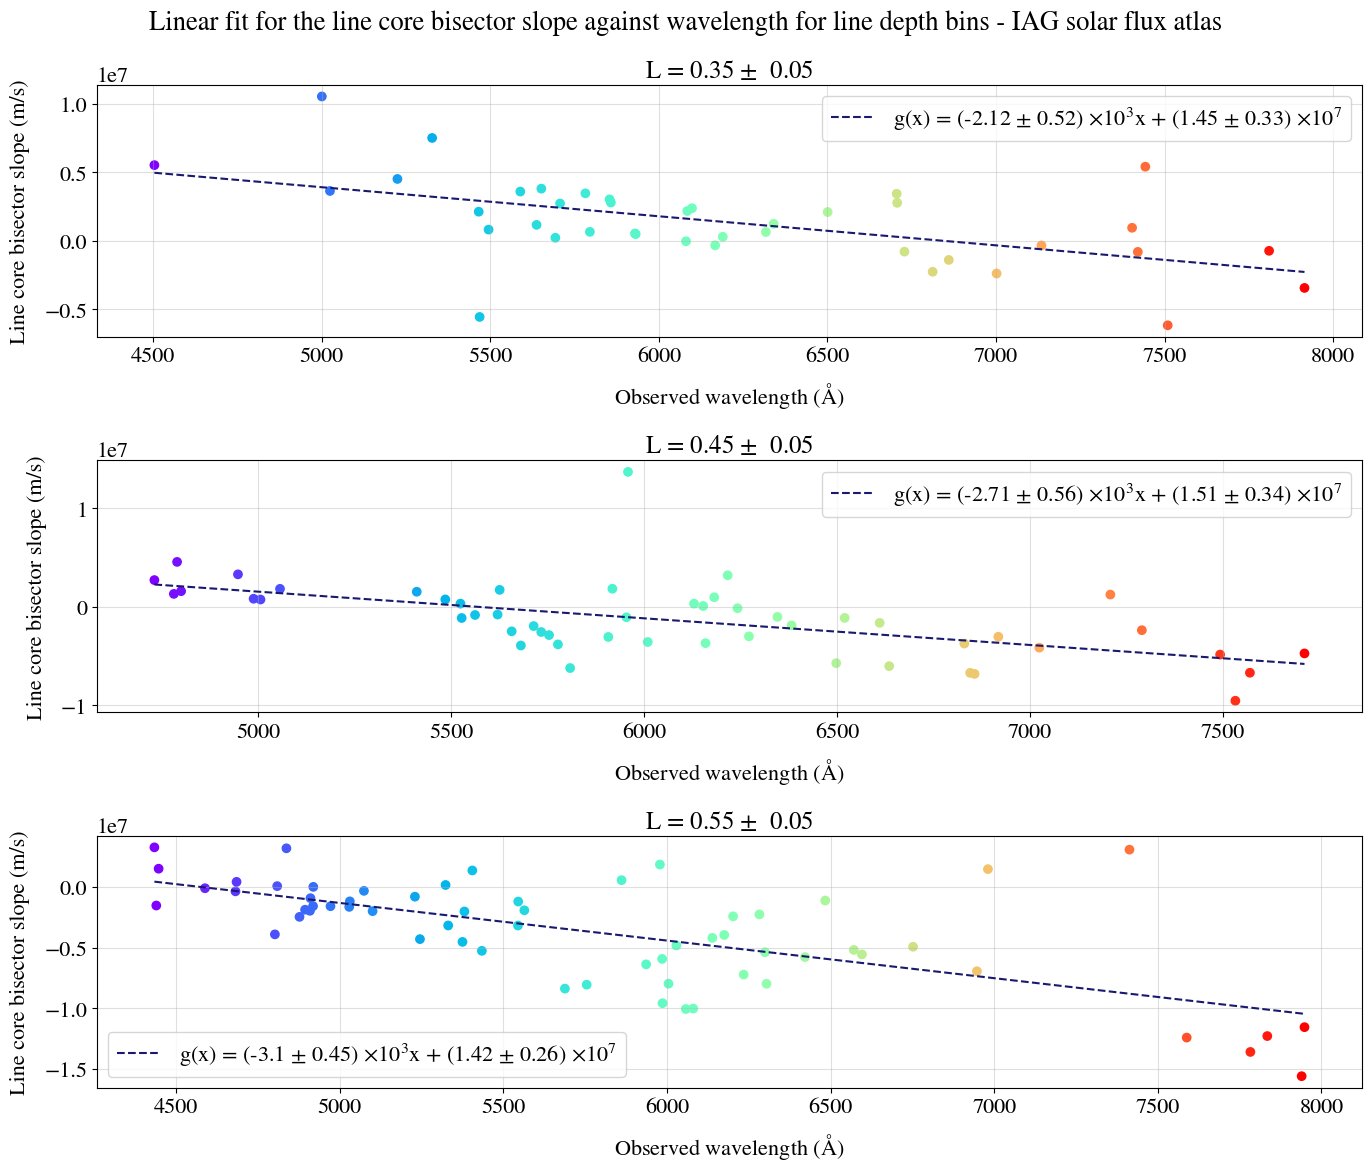

In [10]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []
cov_VIS = []

for i in range(len(velocity_ALL)):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_ALL[i]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Observed wavelength'],new_data['Bisector slope'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))

    cov_VIS.append(pd.DataFrame(error))
    fits_VIS.append([values_fit,fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

#Parameters and their error
param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
param_VIS.columns = ['Slope','Shift']
param_VIS['Error Slope'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[0]
param_VIS['Error Shift'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[1]
param_VIS['Velocity'] = [0.35,0.45,0.55]

fig5, axes = plt.subplots(3, 1, figsize=(14, 12))
fig5.suptitle('Linear fit for the line core bisector slope against wavelength for line depth bins - IAG solar flux atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Observed wavelength'],wave_VIS[i]['Bisector slope'],c=wave_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[i]*1e-3,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[i]*1e-3,2)}) $\times 10^{{3}}$x + ({round(param_VIS["Shift"].iloc[i]*1e-7,2)} $\pm$ {round(param_VIS["Error Shift"].iloc[i]*1e-7,2)}) $\times 10^{{7}}$')
        ax.set_title(f'L = {markers[i]} $\pm$  0.05')
        ax.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)
        ax.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10)
        ax.grid(alpha=0.4)
        ax.legend()

fig5.tight_layout()
# fig5.savefig('Velocity bins bisector VIS')

In [11]:
param_VIS

,Slope,Shift,Error Slope,Error Shift,Velocity
0,-2117.975700,1.449957e+07,522.807319,3.271110e+06,0.35
1,-2707.118767,1.507854e+07,562.713972,3.441271e+06,0.45
2,-3097.450413,1.416590e+07,448.055231,2.619750e+06,0.55


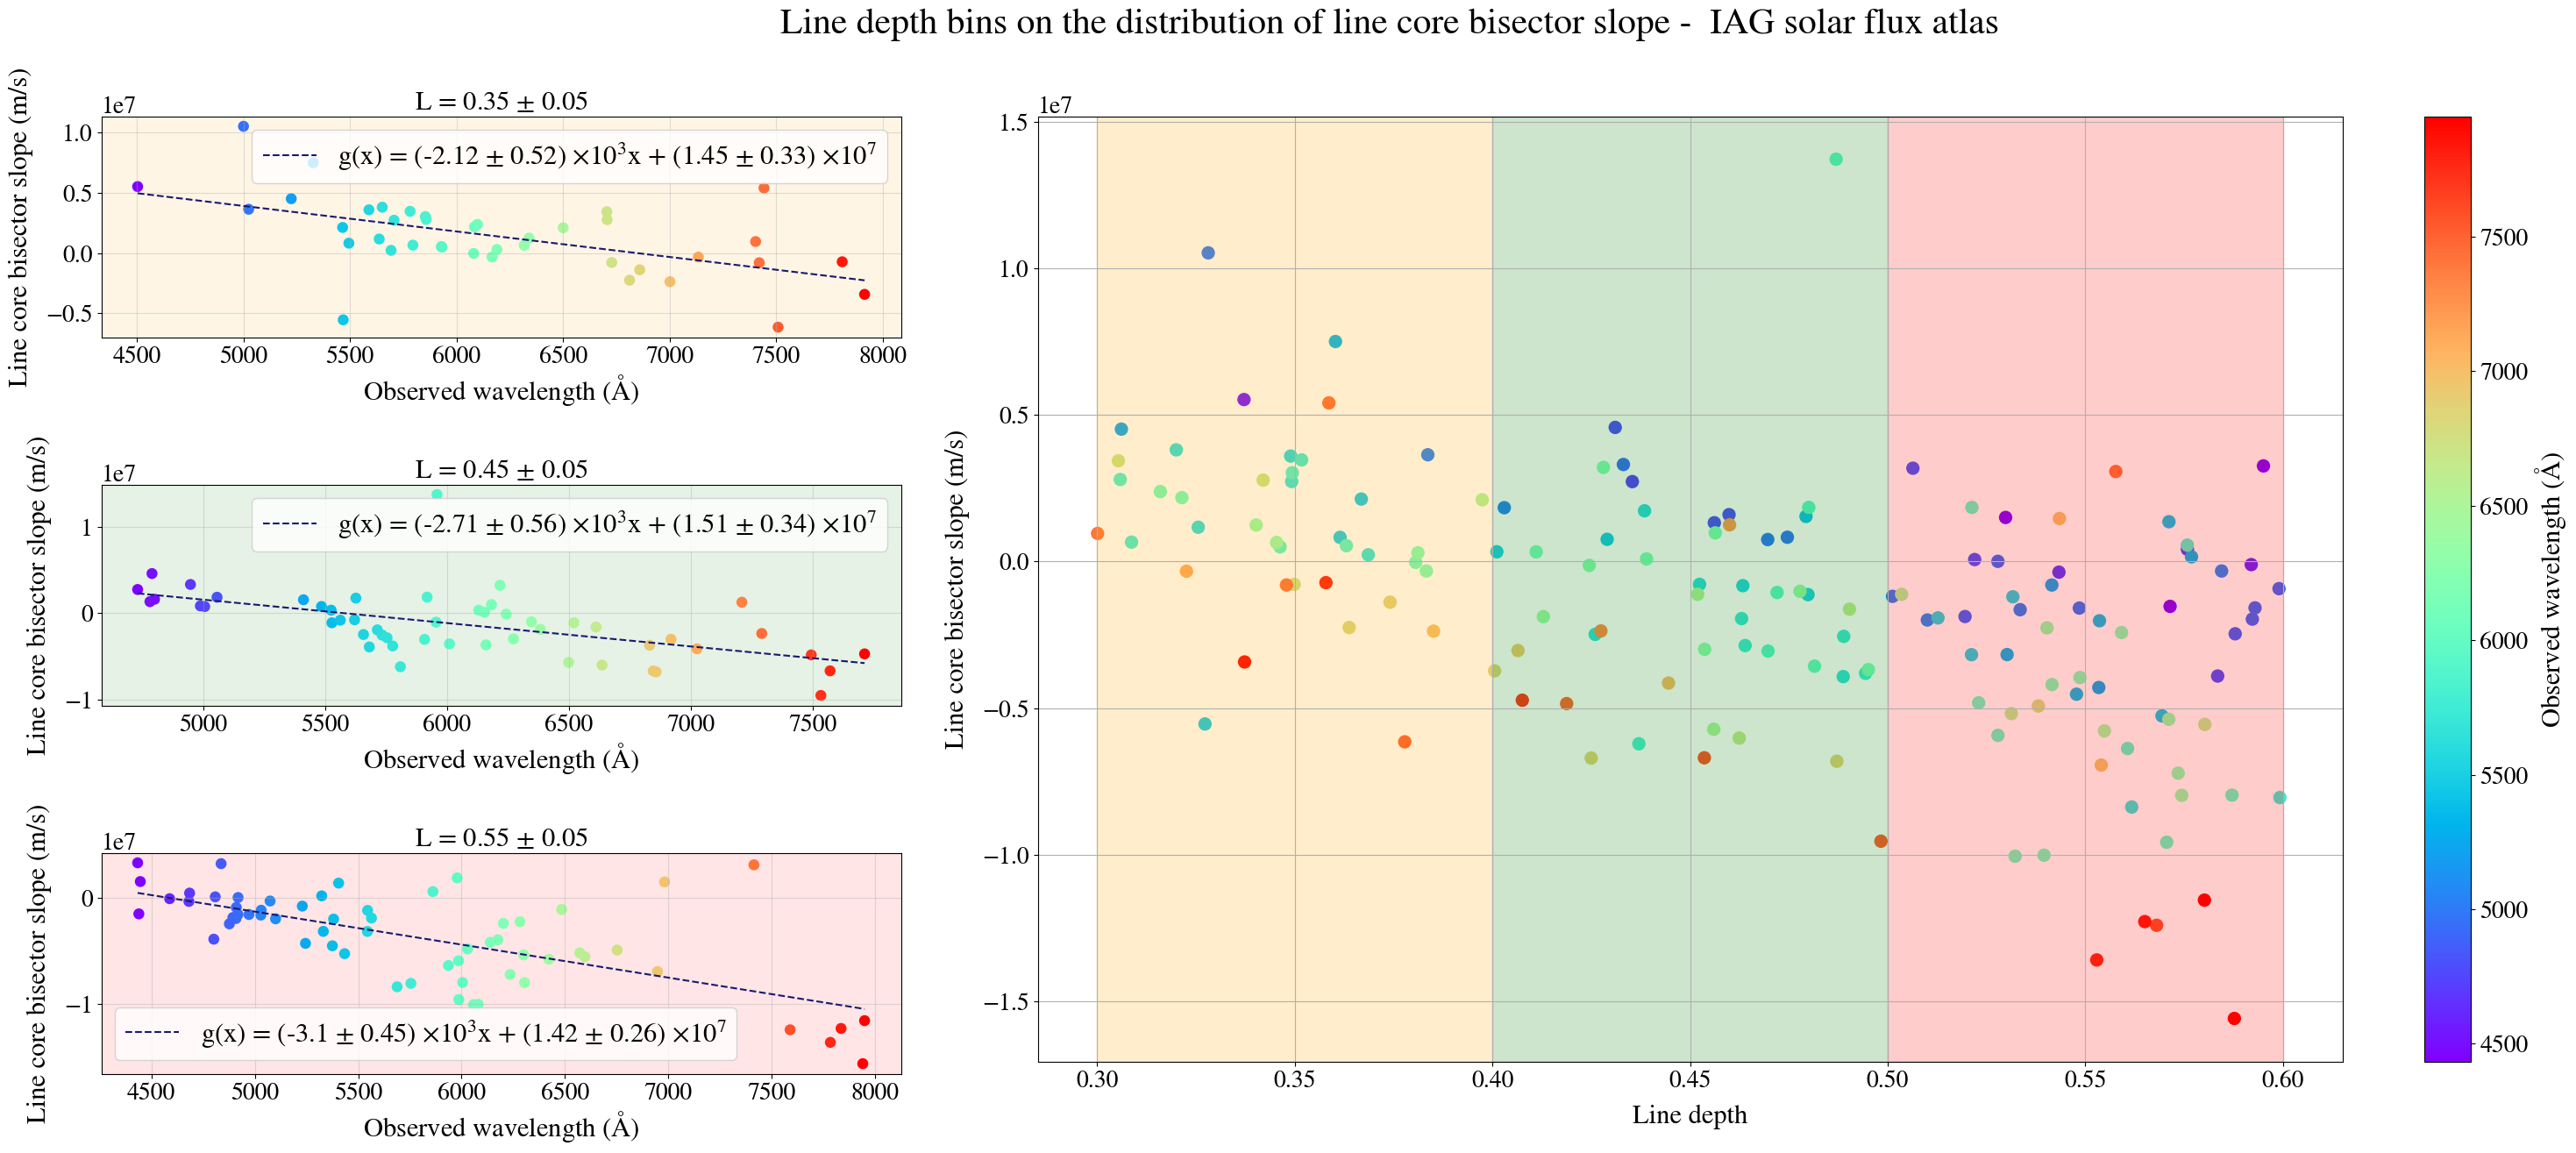

In [ ]:
#Another form to graph
fig3, ax = plt.subplots(figsize=(24, 14))
scatter = ax.scatter(values_VIS_standard['Line Depth'],values_VIS_standard['Bisector slope'],c=values_VIS_standard["Observed wavelength"],cmap='rainbow',s=100)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)

ax.set_title('Line depth bins on the distribution of line core bisector slope -  IAG solar flux atlas',fontsize=30,x=0.27, y=1.08)
ax.set_xlabel(r'Line depth',labelpad=10,fontsize=22)
ax.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10,fontsize=22)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig3.add_axes([-0.32, 0.7, 0.38, 0.18])
ax_insetj = fig3.add_axes([-0.32, 0.4, 0.38, 0.18])
ax_insetk = fig3.add_axes([-0.32, 0.1, 0.38, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_ALL[i]['Observed wavelength'],velocity_ALL[i]['Bisector slope'],c=velocity_ALL[i]["Observed wavelength"],cmap='rainbow',lw=3)
ax_inseti.set_title(f'L = {markers[i]} $\pm$ 0.05')
ax_inseti.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10,fontsize=22)
ax_inseti.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_inseti.plot(fits_VIS[i][0],fits_VIS[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[i]*1e-3,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[i]*1e-3,2)}) $\times 10^{{3}}$x + ({round(param_VIS["Shift"].iloc[i]*1e-7,2)} $\pm$ {round(param_VIS["Error Shift"].iloc[i]*1e-7,2)}) $\times 10^{{7}}$')
ax_inseti.grid(alpha=0.4)
ax_inseti.legend(fontsize=22)

j=1
ax_insetj.scatter(velocity_ALL[j]['Observed wavelength'],velocity_ALL[j]['Bisector slope'],c=velocity_ALL[j]["Observed wavelength"],cmap='rainbow',lw=3)
ax_insetj.set_title(f'L = {markers[j]} $\pm$ 0.05')
ax_insetj.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10,fontsize=22)
ax_insetj.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetj.plot(fits_VIS[j][0],fits_VIS[j][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[j]*1e-3,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[j]*1e-3,2)}) $\times 10^{{3}}$x + ({round(param_VIS["Shift"].iloc[j]*1e-7,2)} $\pm$ {round(param_VIS["Error Shift"].iloc[j]*1e-7,2)}) $\times 10^{{7}}$')
ax_insetj.grid(alpha=0.4)
ax_insetj.legend(fontsize=22)

k=2
ax_insetk.scatter(velocity_ALL[k]['Observed wavelength'],velocity_ALL[k]['Bisector slope'],c=velocity_ALL[k]["Observed wavelength"],cmap='rainbow',lw=3)
ax_insetk.set_title(f'L = {markers[k]} $\pm$ 0.05')
ax_insetk.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10,fontsize=22)
ax_insetk.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetk.plot(fits_VIS[k][0],fits_VIS[k][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[k]*1e-3,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[k]*1e-3,2)}) $\times 10^{{3}}$x + ({round(param_VIS["Shift"].iloc[k]*1e-7,2)} $\pm$ {round(param_VIS["Error Shift"].iloc[k]*1e-7,2)}) $\times 10^{{7}}$')
ax_insetk.grid(alpha=0.4)
ax_insetk.legend(fontsize=22)

# Marcar la región del zoom en la gráfica principal
ax.axvspan(markers[i]-0.05, markers[i]+0.05, alpha=0.2, color='orange')
ax.axvspan(markers[j]-0.05, markers[j]+0.05, alpha=0.2, color='green')
ax.axvspan(markers[k]-0.05, markers[k]+0.05, alpha=0.2, color='red')

ax_inseti.set_facecolor(color=('orange', 0.1))
ax_insetj.set_facecolor(color=('green', 0.1))
ax_insetk.set_facecolor(color=('red', 0.1))

# fig3.savefig('Velocity bins bisector plot_VIS', bbox_inches='tight')

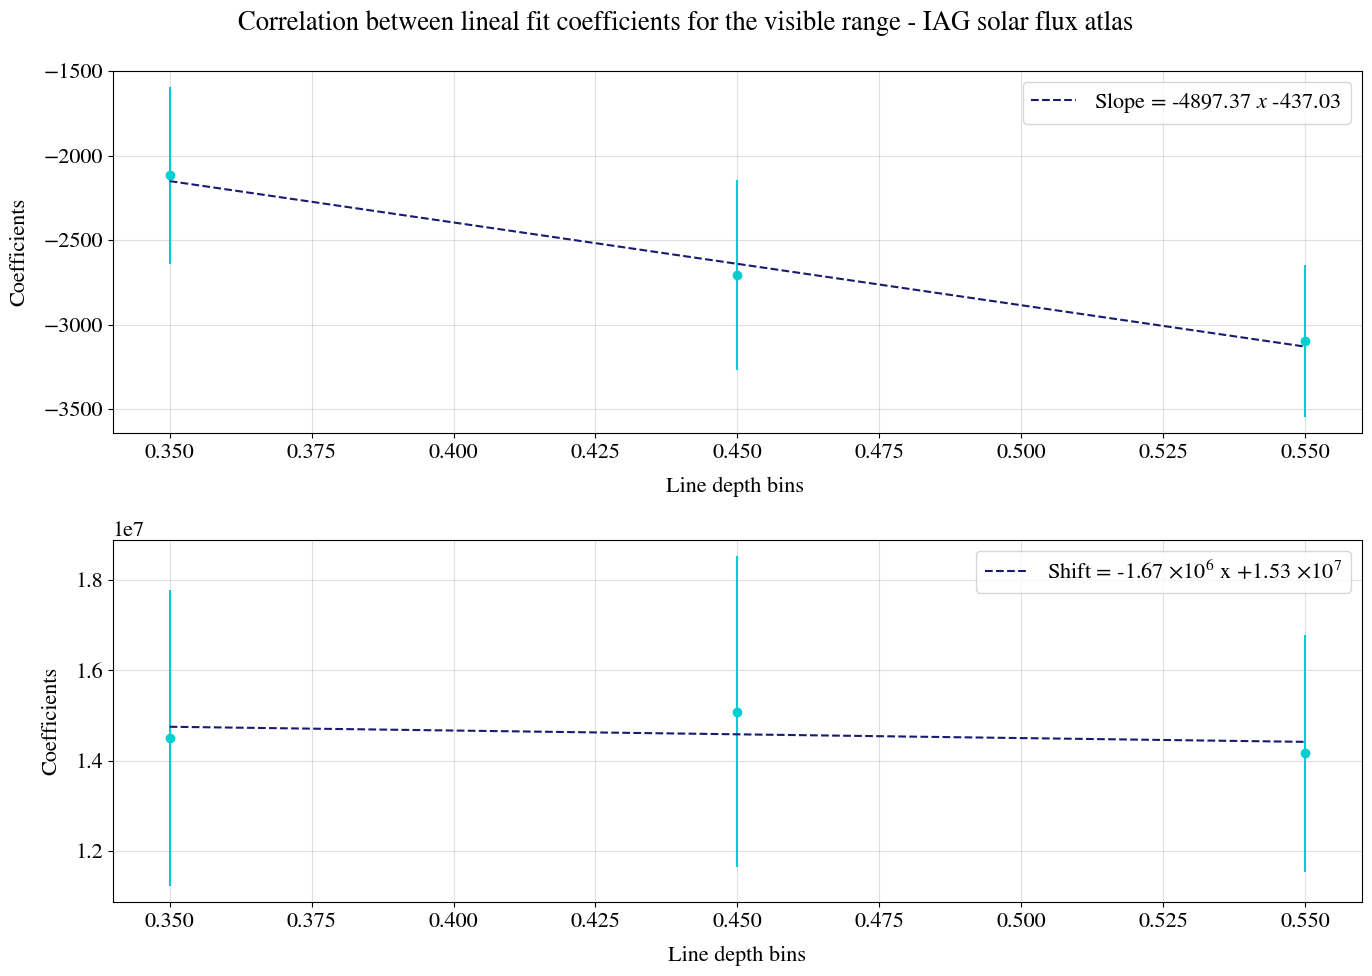

In [12]:
fig3, axes = plt.subplots(2,1,figsize=(14,10))
ax1 = axes[0]
ax2 = axes[1]

ax1.errorbar(param_VIS['Velocity'],param_VIS['Slope'],yerr=param_VIS['Error Slope'],fmt='o',c='darkturquoise')
ax2.errorbar(param_VIS['Velocity'],param_VIS['Shift'],yerr=param_VIS['Error Shift'],fmt='o',c='darkturquoise')

#Made a polynomial first order fit
param1, cov1 = np.polyfit(param_VIS['Velocity'],param_VIS['Slope'], 1,cov=True)
values_fit1 = np.linspace(min(param_VIS['Velocity']), max(param_VIS['Velocity']), 40)
fit1 = np.polyval(param1,values_fit1)

ax1.plot(values_fit1,fit1,c='midnightblue',linestyle='--',label=rf'Slope = {round(param1[0],2)} $x$ -{round(param1[1]*-1,2)} ')

# Made a polynomial first order fit
param2, cov2 = np.polyfit(param_VIS['Velocity'] ,param_VIS['Shift'], 1,cov=True)
values_fit2 = np.linspace(min(param_VIS['Velocity']), max(param_VIS['Velocity']), 40)
fit2 = np.polyval(param2,values_fit2)

ax2.plot(values_fit2,fit2,c='midnightblue',linestyle='--',label=rf'Shift = {round(param2[0]*1e-6,2)} $\times 10^{{6}}$ x +{round(param2[1]*1e-7,2)} $\times 10^{{7}}$')

fig3.suptitle('Correlation between lineal fit coefficients for the visible range - IAG solar flux atlas')

ax1.set_xlabel(r'Line depth bins ',labelpad=10)
ax2.set_xlabel(r'Line depth bins',labelpad=10)
ax1.set_ylabel(r'Coefficients',labelpad=10)
ax2.set_ylabel(r'Coefficients',labelpad=10)
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax1.legend()
ax2.legend()
fig3.tight_layout()

# fig3.savefig('asymetries coeficients VIS')

### Spatially Resolved Quiet Sun Atlas

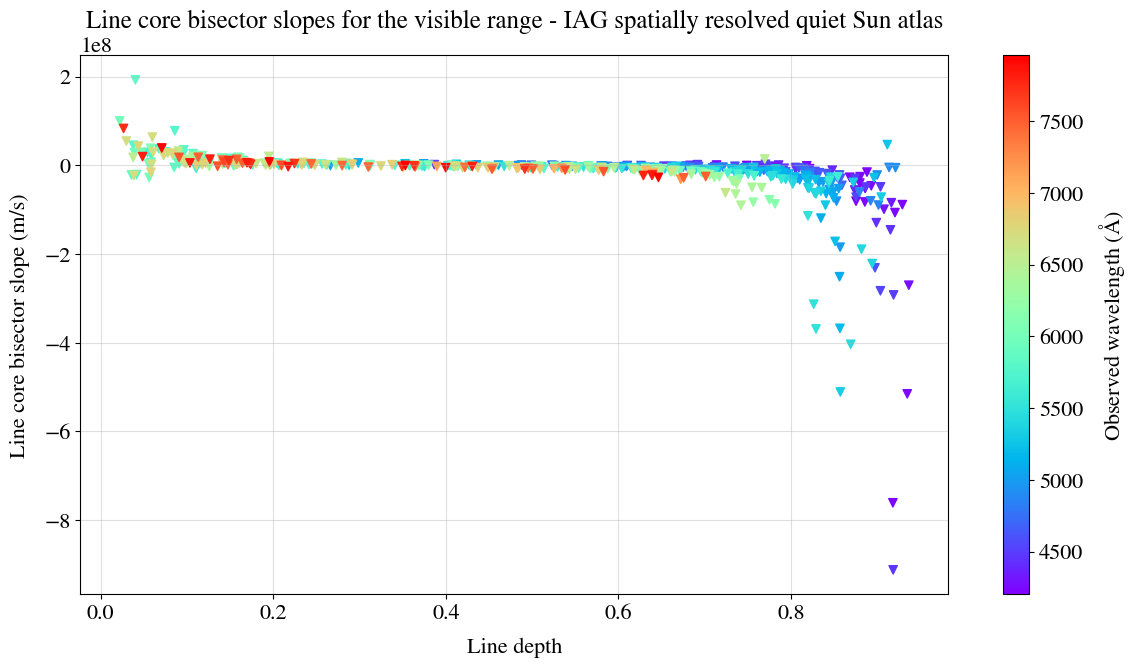

In [13]:
fig2, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Bisector slope'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Line core bisector slopes for the visible range - IAG spatially resolved quiet Sun atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig2.savefig('Bisector_SPA')

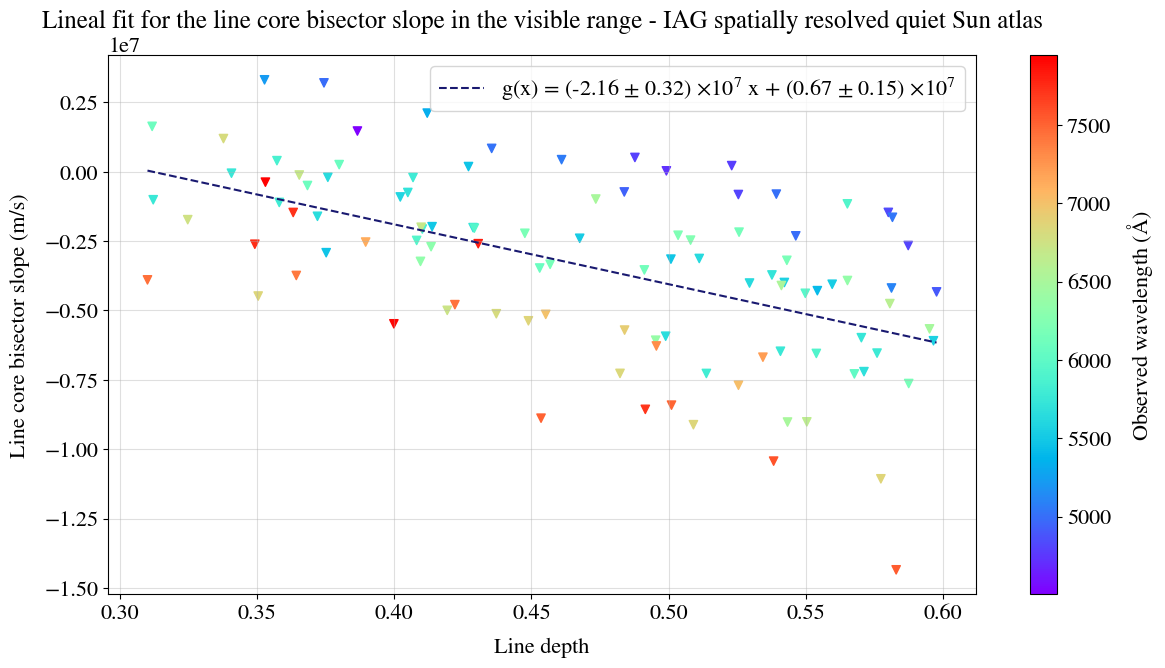

In [14]:
#In the report is given in function of the velocity
values_SPA_standard = SPA_data[SPA_data['Line Depth'].between(0.3,0.6,inclusive='right')]

#Made a polynomial first order fit
param, cov = np.polyfit(values_SPA_standard['Line Depth'],values_SPA_standard['Bisector slope'], 1,cov=True)
values_fit = np.linspace(min(values_SPA_standard['Line Depth']), max(values_SPA_standard['Line Depth']), len(values_SPA_standard['Line Depth']))
fit = np.polyval(param,values_fit)
# Standard error
error = np.sqrt(np.diag(cov))

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(14,7))

ax1.set_title(r'Lineal fit for the line core bisector slope in the visible range - IAG spatially resolved quiet Sun atlas',pad = 20)

scatter = ax1.scatter(values_SPA_standard['Line Depth'],values_SPA_standard['Bisector slope'],c=values_SPA_standard["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$', labelpad=10)

ax1.plot(values_fit,fit,linestyle='--',c='midnightblue',
         label=rf'g(x) = ({round(param[0]*1e-7,2)} $\pm$ {round(error[0]*1e-7,2)}) $\times 10^{{7}}$ x + ({round(param[1]*1e-7,2)} $\pm$ {round(error[1]*1e-7,2)}) $\times 10^{{7}}$')
ax1.set_xlabel(r'Line depth',labelpad=10)
ax1.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10)
ax1.grid(alpha=0.4)
ax1.legend()

# fig2.savefig('Bisector slope_SPA')

In [15]:
param

array([-21566128.90853341,   6727950.02637495])

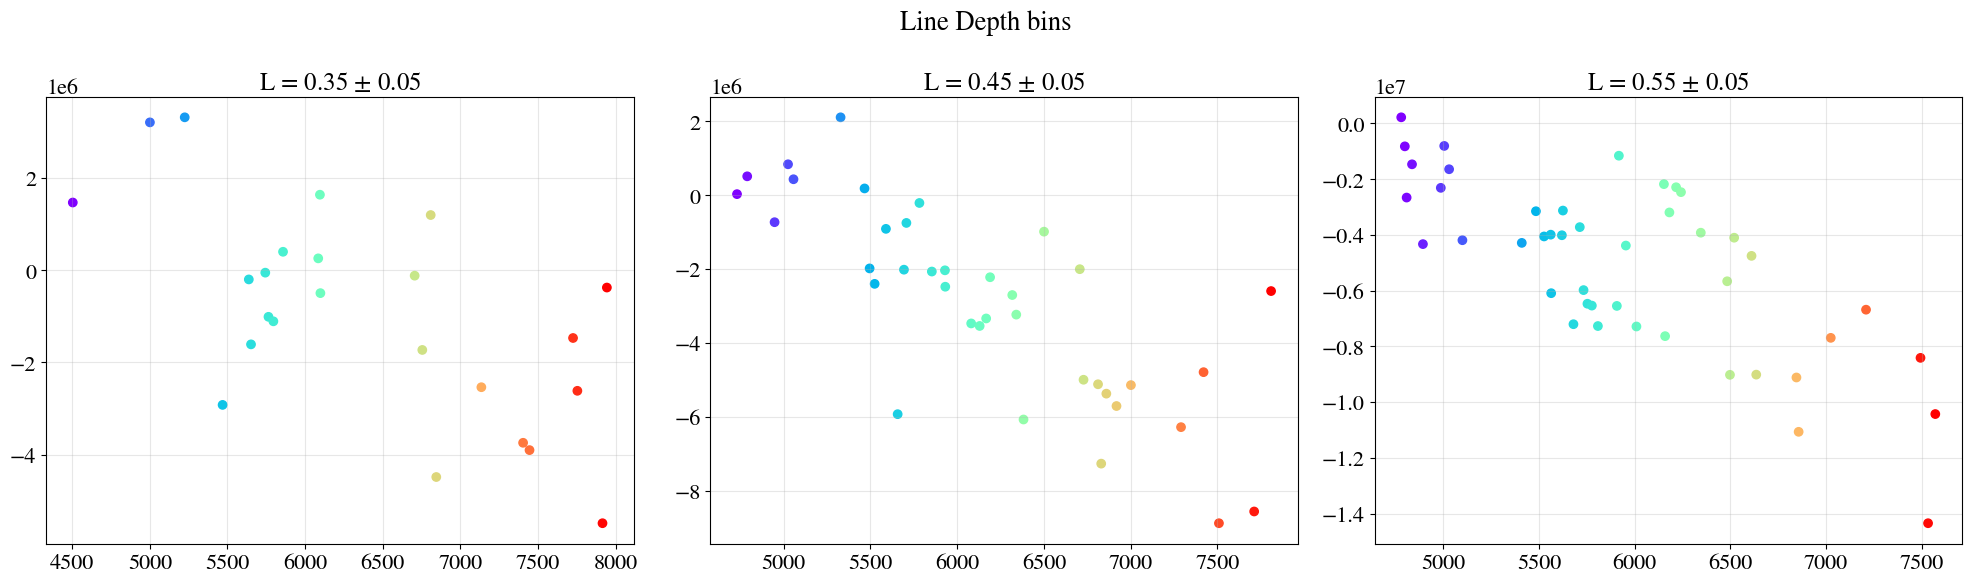

In [16]:
#Organize the dataframe wtih ascending velocities
listed = values_SPA_standard.sort_values('Line Depth', ascending=True, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [0.35,0.45,0.55]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(values_SPA_standard[values_SPA_standard['Line Depth'].between(each-0.05, each+0.05, inclusive='neither')])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Line Depth bins')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Observed wavelength'],velocity_SPA[i]['Bisector slope'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'L = {markers[i]} $\pm$ 0.05')
        ax.grid(True, alpha=0.3)

fig.tight_layout()

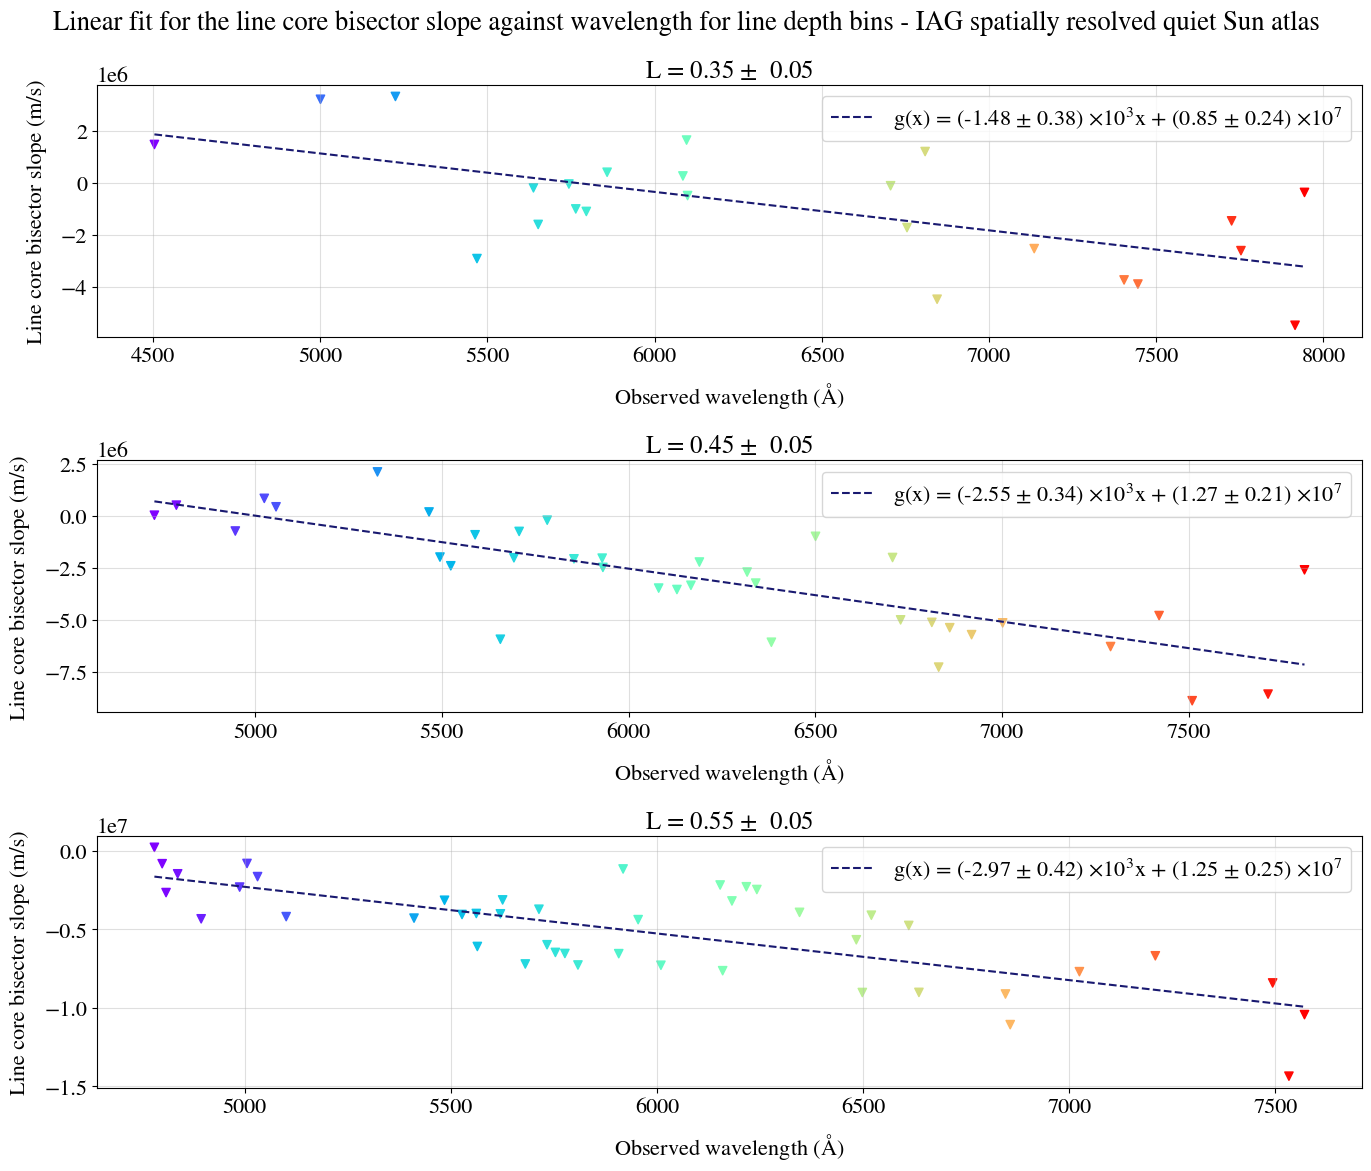

In [17]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(len(velocity_SPA)):
    #Reduce the scattered points to observe the values of slopes
    new_data =velocity_SPA[i]

    #polynomial fit
    param, cov = np.polyfit(new_data['Observed wavelength'],new_data['Bisector slope'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))

    cov_SPA.append(pd.DataFrame(error))
    fits_SPA.append([values_fit,fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

#Parameters and their error
param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
param_SPA.columns = ['Slope','Shift']
param_SPA['Error Slope'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[0]
param_SPA['Error Shift'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[1]
param_SPA['Velocity'] = [0.35,0.45,0.55]

fig5, axes = plt.subplots(3, 1, figsize=(14, 12))
fig5.suptitle('Linear fit for the line core bisector slope against wavelength for line depth bins - IAG spatially resolved quiet Sun atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Observed wavelength'],wave_SPA[i]['Bisector slope'],c=wave_SPA[i]["Observed wavelength"],cmap='rainbow',marker='v')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_SPA["Slope"].iloc[i]*1e-3,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[i]*1e-3,2)}) $\times 10^{{3}}$x + ({round(param_SPA["Shift"].iloc[i]*1e-7,2)} $\pm$ {round(param_SPA["Error Shift"].iloc[i]*1e-7,2)}) $\times 10^{{7}}$')
        ax.set_title(f'L = {markers[i]} $\pm$  0.05')
        ax.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)
        ax.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10)
        ax.grid(alpha=0.4)
        ax.legend()

fig5.tight_layout()


# fig5.savefig('Velocity bins bisector SPA')

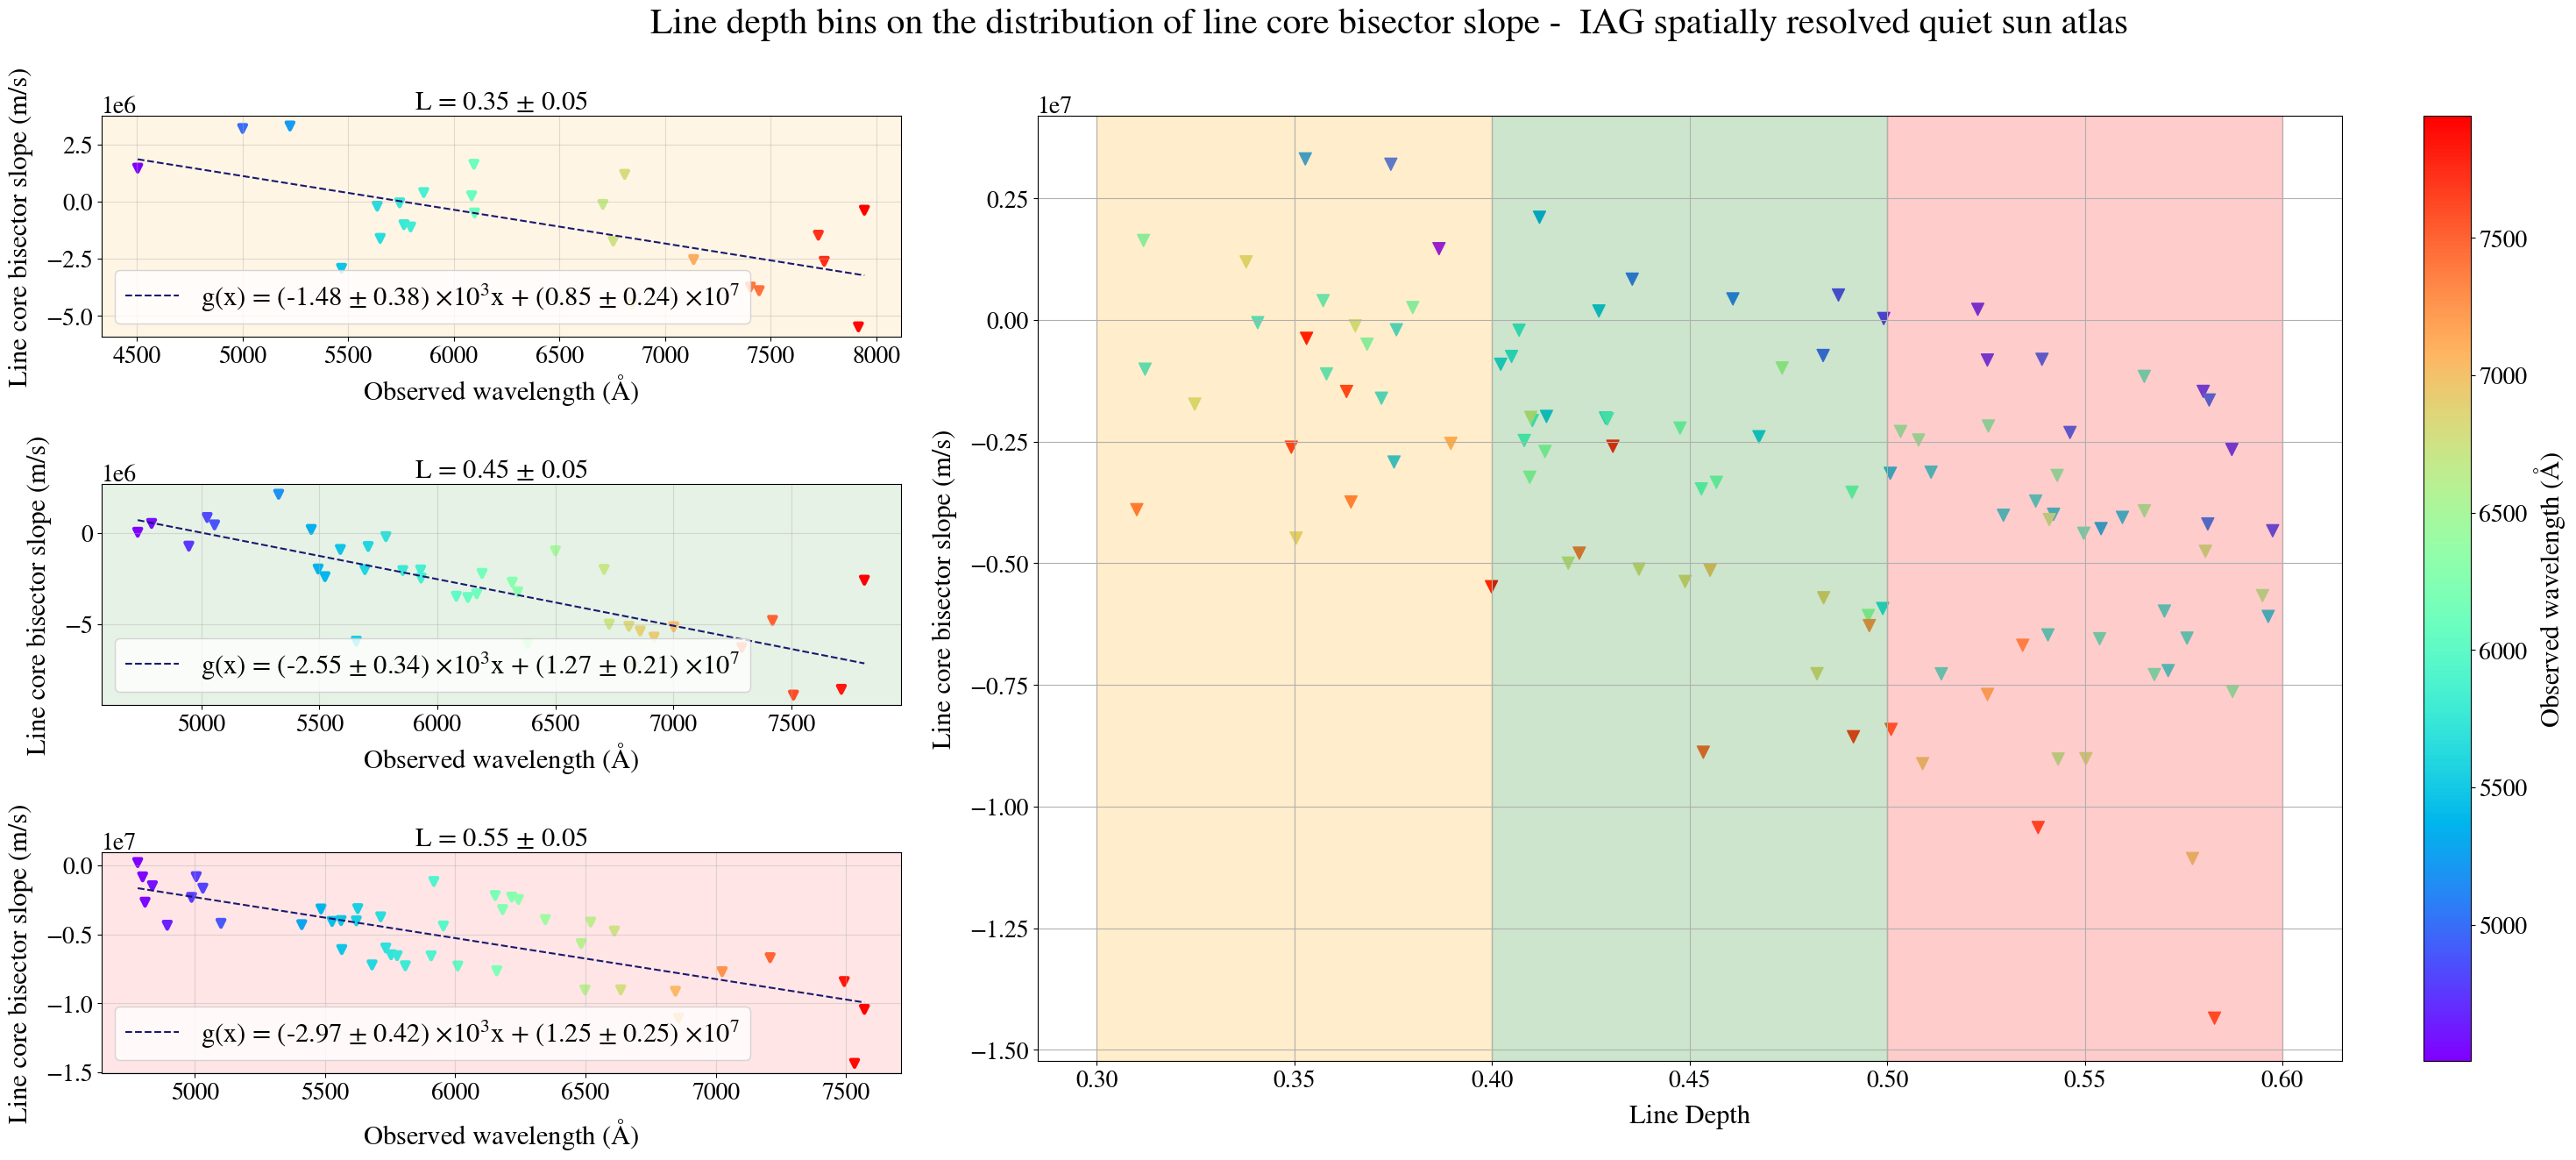

In [ ]:
#Another form to graph
fig3, ax = plt.subplots(figsize=(24, 14))
scatter = ax.scatter(values_SPA_standard['Line Depth'],values_SPA_standard['Bisector slope'],c=values_SPA_standard["Observed wavelength"],cmap='rainbow',s=100,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)

ax.set_title('Line depth bins on the distribution of line core bisector slope -  IAG spatially resolved quiet sun atlas',fontsize=30,x=0.27, y=1.08)
ax.set_xlabel(r'Line Depth',labelpad=10,fontsize=22)
ax.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10,fontsize=22)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig3.add_axes([-0.32, 0.7, 0.38, 0.18])
ax_insetj = fig3.add_axes([-0.32, 0.4, 0.38, 0.18])
ax_insetk = fig3.add_axes([-0.32, 0.1, 0.38, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_SPA[i]['Observed wavelength'],velocity_SPA[i]['Bisector slope'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow',marker='v',lw=3)
ax_inseti.set_title(f'L = {markers[i]} $\pm$ 0.05')
ax_inseti.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10,fontsize=22)
ax_inseti.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_inseti.plot(fits_SPA[i][0],fits_SPA[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_SPA["Slope"].iloc[i]*1e-3,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[i]*1e-3,2)}) $\times 10^{{3}}$x + ({round(param_SPA["Shift"].iloc[i]*1e-7,2)} $\pm$ {round(param_SPA["Error Shift"].iloc[i]*1e-7,2)}) $\times 10^{{7}}$')
ax_inseti.grid(alpha=0.4)
ax_inseti.legend(fontsize=22)

j=1
ax_insetj.scatter(velocity_SPA[j]['Observed wavelength'],velocity_SPA[j]['Bisector slope'],c=velocity_SPA[j]["Observed wavelength"],cmap='rainbow',marker='v',lw=3)
ax_insetj.set_title(f'L = {markers[j]} $\pm$ 0.05')
ax_insetj.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10,fontsize=22)
ax_insetj.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetj.plot(fits_SPA[j][0],fits_SPA[j][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_SPA["Slope"].iloc[j]*1e-3,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[j]*1e-3,2)}) $\times 10^{{3}}$x + ({round(param_SPA["Shift"].iloc[j]*1e-7,2)} $\pm$ {round(param_SPA["Error Shift"].iloc[j]*1e-7,2)}) $\times 10^{{7}}$')
ax_insetj.grid(alpha=0.4)
ax_insetj.legend(fontsize=22)

k=2
ax_insetk.scatter(velocity_SPA[k]['Observed wavelength'],velocity_SPA[k]['Bisector slope'],c=velocity_SPA[k]["Observed wavelength"],cmap='rainbow',marker='v',lw=3)
ax_insetk.set_title(f'L = {markers[k]} $\pm$ 0.05')
ax_insetk.set_ylabel(r'Line core bisector slope (m/s)',labelpad=10,fontsize=22)
ax_insetk.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$' ,labelpad=10,fontsize=22)
ax_insetk.plot(fits_SPA[k][0],fits_SPA[k][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_SPA["Slope"].iloc[k]*1e-3,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[k]*1e-3,2)}) $\times 10^{{3}}$x + ({round(param_SPA["Shift"].iloc[k]*1e-7,2)} $\pm$ {round(param_SPA["Error Shift"].iloc[k]*1e-7,2)}) $\times 10^{{7}}$')
ax_insetk.grid(alpha=0.4)
ax_insetk.legend(fontsize=22)

# Marcar la región del zoom en la gráfica principal
ax.axvspan(markers[i]-0.05, markers[i]+0.05, alpha=0.2, color='orange')
ax.axvspan(markers[j]-0.05, markers[j]+0.05, alpha=0.2, color='green')
ax.axvspan(markers[k]-0.05, markers[k]+0.05, alpha=0.2, color='red')

ax_inseti.set_facecolor(color=('orange', 0.1))
ax_insetj.set_facecolor(color=('green', 0.1))
ax_insetk.set_facecolor(color=('red', 0.1))

# fig3.savefig('Velocity bins bisector plot_SPA', bbox_inches='tight')

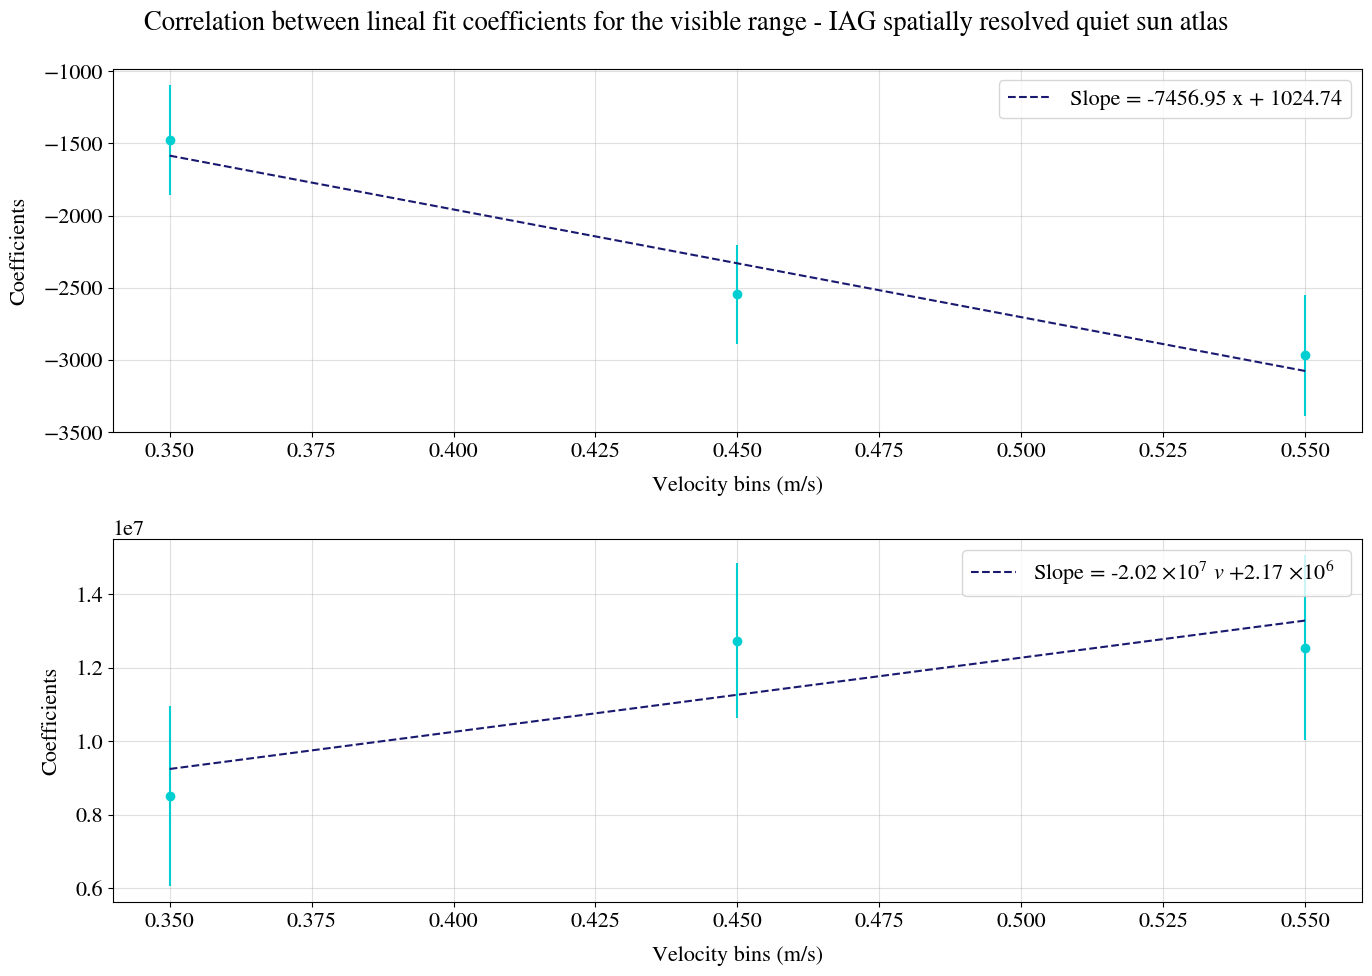

In [18]:
fig3, axes = plt.subplots(2,1,figsize=(14,10))
ax1 = axes[0]
ax2 = axes[1]

ax1.errorbar(param_SPA['Velocity'],param_SPA['Slope'],yerr=param_SPA['Error Slope'],fmt='o',c='darkturquoise')
ax2.errorbar(param_SPA['Velocity'],param_SPA['Shift'],yerr=param_SPA['Error Shift'],fmt='o',c='darkturquoise')

#Made a polynomial first order fit
param1, cov1 = np.polyfit(param_SPA['Velocity'],param_SPA['Slope'], 1,cov=True)
values_fit1 = np.linspace(min(param_SPA['Velocity']), max(param_SPA['Velocity']), 20)
fit1 = np.polyval(param1,values_fit1)

ax1.plot(values_fit1,fit1,linestyle='--',c='midnightblue',label=rf'Slope = {round(param1[0],2)} x + {round(param1[1],2)}')

# Made a polynomial first order fit
param2, cov2 = np.polyfit(param_SPA['Velocity'] ,param_SPA['Shift'], 1,cov=True)
values_fit2 = np.linspace(min(param_SPA['Velocity']), max(param_SPA['Velocity']), 20)
fit2 = np.polyval(param2,values_fit2)

ax2.plot(values_fit2,fit2,linestyle='--',c='midnightblue',label=rf'Slope = {round(param2[0]*-1e-7,2)} $\times 10^{{7}}$ $v$ +{round(param2[1]*1e-6,2)} $\times 10^{{6}}$  ')

fig3.suptitle('Correlation between lineal fit coefficients for the visible range - IAG spatially resolved quiet sun atlas')

ax1.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax2.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax1.set_ylabel(r'Coefficients',labelpad=10)
ax2.set_ylabel(r'Coefficients',labelpad=10)
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax1.legend()
ax2.legend()
fig3.tight_layout()

# fig3.savefig('asymetries coeficients SPA')